# KNN Model

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
import gensim 

import numpy as np

### Read the data that has the features from Spotify API appended to it 

In [23]:
df_all=pd.read_csv("all_features4k_playlist.csv")

In [24]:
df_all=df_all.drop(["Unnamed: 0"],axis=1)



In [113]:
df_all.columns

Index(['Unnamed: 0', 'trackid', 'artist_name', 'track_name', 'duration_ms',
       'album_name', 'pid', 'Danceability', 'Instrumentalness', 'Loudness',
       'Speechiness', 'Valence', 'Energy', 'Mode', 'Tempo', 'Livenss', 'Key',
       'Acousticness'],
      dtype='object')

In [115]:
df_all=df_all.drop(['Unnamed: 0'],axis=1)

In [26]:
df_uniq=df_all.drop_duplicates(keep='first', inplace=False,subset=df_all.columns.difference(['pid']))


## Basic KNN 

**If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information.** 

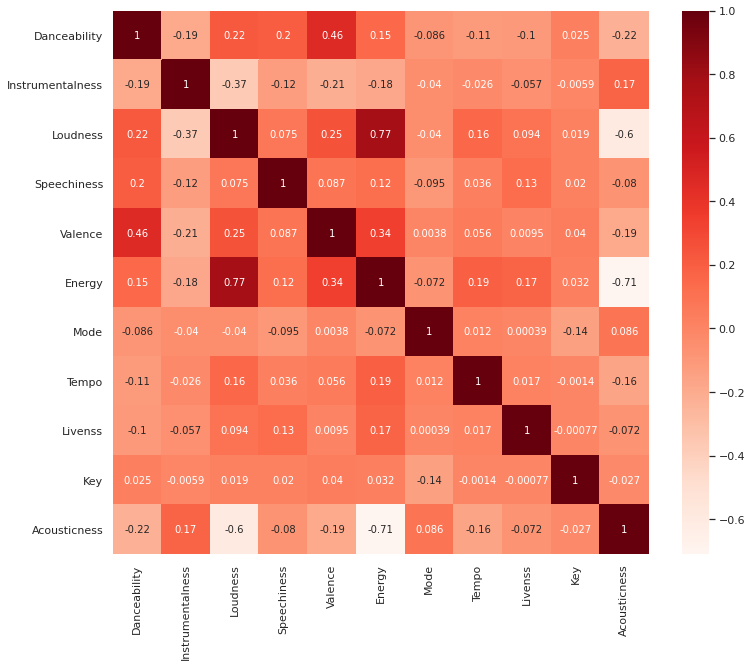

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
heat_map_col=['Danceability', 'Instrumentalness', 'Loudness', 'Speechiness',
       'Valence', 'Energy', 'Mode', 'Tempo', 'Livenss', 'Key', 'Acousticness']
heat_map_df=df_uniq[heat_map_col]

plt.figure(figsize=(12,10))
cor = heat_map_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
# sns.heatmap(df['Danceability', 'Instrumentalness', 'Loudness', 'Speechiness','Valence', 'Energy', 'Mode', 'Tempo', 'Livenss', 'Key', 'Acousticness'])

Picking five features , 'Danceability','Instrumentalness','Loudness','Speechiness','Valence' as they are less correlated.

In [25]:
wanted=['Danceability','Instrumentalness','Loudness','Speechiness','Valence']

In [131]:
df_np=df_uniq.to_numpy()


In [40]:

given_list=df_np[6]
inp=df_np[6]

In [132]:
given_list=given_list[6:11]



### Calculating cosine distance and Euclidian distance and adding sorting them 

In [36]:
from numpy import dot
from numpy.linalg import norm
j=0
similarity_dict={}
euclidian_dict={}
for entry in df_np:

    cos_sim = dot(entry[6:11], given_list)/(norm(entry[6:11])*norm(given_list))
    euclidian=np.sqrt(np.sum((entry[6:11]-given_list)**2))

    similarity_dict[j]=cos_sim
    euclidian_dict[j]=euclidian
    
    j+=1
    

In [37]:
sorted_dict_cos_sim=sorted(similarity_dict.items(), key = 
             lambda kv:(kv[1], kv[0]),reverse=True)
sorted_dict_euclidian=sorted(euclidian_dict.items(), key = 
             lambda kv:(kv[1], kv[0]))


### Top 10 recommendations 

In [47]:

print("K-NN (K=10)")
print("Given track : Artist :",df_np[6][1]," Track:",df_np[6][2]," Album :",df_np[6][4])
a=dict(sorted_dict_cos_sim)

a_keys=a.keys()

b=dict(sorted_dict_euclidian)
print("Based on cosine similarity")
print("***************************")
b_keys=b.keys()
j=0
for keys in a:
    if(df_np[keys][0]!=inp[0]):
    
        print(str(j+1)+") Artist :",df_np[keys][1]," Track:",df_np[keys][2]," Album :",df_np[keys][4])

        j+=1
    if(j==10):
        break
print("\nBased on Euclidian")
print("**********************")
j=0
for keys in b:
    if(df_np[keys][0]!=inp[0]):
        print(str(j+1)+")Artist :",df_np[keys][1]," Track:",df_np[keys][2]," Album :",df_np[keys][4])
        j+=1
    if(j==10):
        break

    

K-NN (K=10)
Given track : Artist : Usher  Track: My Boo  Album : Confessions
Based on cosine similarity
***************************
1) Artist : Justin Bieber  Track: As Long As You Love Me - Audien Dubstep Mix  Album : As Long As You Love Me
2) Artist : Rafael Escalona  Track: El Testamento  Album : Homenaje a Los Grandes Compositores de la Música Tropical Colombiana Volume 3
3) Artist : This Century  Track: Young and Useless  Album : Sound Of Fire
4) Artist : Justin Bieber  Track: Overboard (Live)  Album : Never Say Never - The Remixes
5) Artist : Felly  Track: This Shit Comes in Waves  Album : This Shit Comes in Waves
6) Artist : The Ready Set  Track: Trash Talking Love (feat. Kitty)  Album : Trash Talking Love (feat. Kitty) - Single
7) Artist : Saliva  Track: Always  Album : Back Into Your System
8) Artist : Saliva  Track: Always  Album : Back Into Your System
9) Artist : Dave Barnes  Track: I Pray On Christmas  Album : Very Merry Christmas
10) Artist : Jesus Culture  Track: How He 

# PCA Based 

**From the plot, we get that we need 8 components to retain 95% variance in the data** 

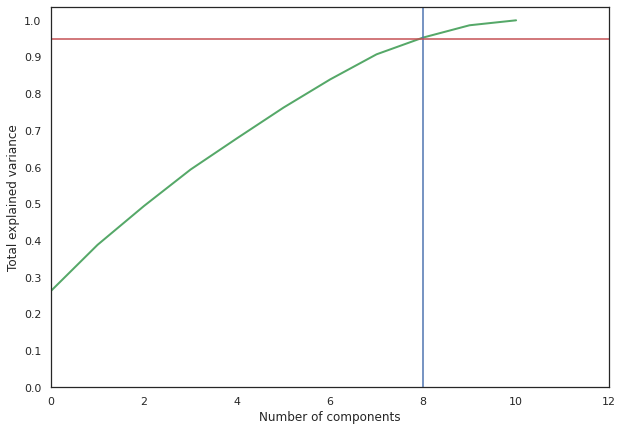

In [29]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
pca_df=df_uniq[heat_map_col]
X_scaled = StandardScaler().fit_transform(heat_map_df)

pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='g', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 12)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(8, c='b')
plt.axhline(0.95, c='r')
plt.show();

**Performing PCA with 8 components**

In [30]:
pca = decomposition.PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)


In [48]:
given_list= X_pca[7]

In [49]:
from numpy import dot
from numpy.linalg import norm
j=0
similarity_dict={}
euclidian_dict={}
for entry in X_pca:
#     print(entry)
    cos_sim = dot(entry, given_list)/(norm(entry)*norm(given_list))
    euclidian=np.sqrt(np.sum((entry-given_list)**2))
#     print(euclidian)
    similarity_dict[j]=cos_sim
    euclidian_dict[j]=euclidian
    
    j+=1

In [50]:
sorted_dict_cos_sim=sorted(similarity_dict.items(), key = 
             lambda kv:(kv[1], kv[0]),reverse=True)
sorted_dict_euclidian=sorted(euclidian_dict.items(), key = 
             lambda kv:(kv[1], kv[0]))

### Recommendations for a single input track (both based on cosine similarity and Euclidian distance) 

In [54]:
print("K-NN (K=10)")
print("Given track : Artist :",df_np[7][1]," Track:",df_np[7][2]," Album :",df_np[7][4])
a=dict(sorted_dict_cos_sim)
# print(sorted_dict_cos_sim)
a_keys=a.keys()
# print(list(a_keys))
b=dict(sorted_dict_euclidian)
print("Based on cosine similarity")
print("**********************")
b_keys=b.keys()

j=0
for keys in a:
    if(df_np[keys][0]!=df_np[7][0]):
    
        print(str(j+1)+") Artist :",df_np[keys][1]," | Track:",df_np[keys][2]," | Album :",df_np[keys][4])

        j+=1
    if(j==10):
        break
print("\nBased on Euclidian")
print("**********************")
j=0
for keys in b:
    if(df_np[keys][0]!=df_np[7][0]):
    
        print(str(j+1)+") Artist :",df_np[keys][1]," | Track:",df_np[keys][2]," | Album :",df_np[keys][4])

        j+=1
    if(j==10):
        break
    
    

K-NN (K=10)
Given track : Artist : The Pussycat Dolls  Track: Buttons  Album : PCD
Based on cosine similarity
**********************
1) Artist : Linkin Park  | Track: Nobody's Listening  | Album : Meteora
2) Artist : Mista Cane  | Track: Slow Down  | Album : In My Life
3) Artist : EXO  | Track: 백색소음 White Noise  | Album : EX'ACT - The 3rd Album
4) Artist : Earl St. Clair  | Track: Good Time  | Album : Good Time
5) Artist : The Dirty River Boys  | Track: Down by the River  | Album : The Dirty River Boys
6) Artist : Action Bronson  | Track: Knicks (Bonus)  | Album : Soul Killa
7) Artist : Atmosphere  | Track: Little Man  | Album : You Can't Imagine How Much Fun We're Having
8) Artist : Mac Miller  | Track: Up All Night  | Album : Blue Slide Park
9) Artist : Smija  | Track: Paper Pools  | Album : Everything Was the Same
10) Artist : Nach  | Track: Tantas Razones  | Album : A Través De Mí

Based on Euclidian
**********************
1) Artist : Linkin Park  | Track: Nobody's Listening  | Alb

# Multiple input songs 

**Creating a set of 5,10,15,20,25 random input tracks**

In [55]:
import random
ranges=[5,10,15,20,25]
five_songs=[]
ten_songs=[]
fifteen_songs=[]
twentyfive_songs=[]
twenty_songs=[]
for i in range(0,ranges[0]):
    five_songs.append(random.randint(0,len(X_pca)))
for i in range(0,ranges[1]):
    ten_songs.append(random.randint(0,len(X_pca)))
for i in range(0,ranges[2]):
    fifteen_songs.append(random.randint(0,len(X_pca)))
for i in range(0,ranges[3]):
    twenty_songs.append(random.randint(0,len(X_pca)))
for i in range(0,ranges[4]):
    twentyfive_songs.append(random.randint(0,len(X_pca)))



In [56]:
indices=[[],[],[],[],[]]
indices[0]=five_songs
indices[1]=ten_songs
indices[2]=fifteen_songs
indices[3]=twenty_songs
indices[4]=twentyfive_songs

In [57]:
five_songlist=[]
for i in range(0,len(five_songs)):
    five_songlist.append(X_pca[five_songs[i]])
    

ten_songlist=[]
for i in range(0,len(ten_songs)):
    ten_songlist.append(X_pca[ten_songs[i]])
    
fifteen_songlist=[]
for i in range(0,len(fifteen_songs)):
    fifteen_songlist.append(X_pca[fifteen_songs[i]])
    
twenty_songlist=[]
for i in range(0,len(twenty_songs)):
    twenty_songlist.append(X_pca[twenty_songs[i]])
    
twentyfive_songlist=[]
for i in range(0,len(twentyfive_songs)):
    twentyfive_songlist.append(X_pca[twentyfive_songs[i]])
    

    

In [58]:
spotifyIdsMultiple=[[],[],[],[],[]]
for i in range(0,len(ranges)):
    for j in range(0,ranges[i]):
        spotifyIdsMultiple[i].append(df_np[indices[i][j]][0])
        

In [60]:
def checkKey(dictionary, key): 
      
    if key in dictionary.keys(): 
        return True
        
    else: 
        return False

In [65]:
from numpy import dot
from numpy.linalg import norm
def calcCosineSimilairity(inputSongs):
    similarity_dict={}
    euclidian_dict={}
    k=-1
    print(len(inputSongs))
    for song in inputSongs:
        k=k+1

        j=0
        for entry in X_pca:
    
            cos_sim = dot(entry, song)/(norm(entry)*norm(song))
            euclidian=np.sqrt(np.sum((entry-song)**2))
        
            ret=checkKey(similarity_dict,j)
            ret2=checkKey(euclidian_dict,j)
            if(ret==True):

                if(similarity_dict[j][0]<cos_sim):
                    similarity_dict[j]=[cos_sim,k]


            else:
                similarity_dict[j]=[cos_sim,k]

            


    return similarity_dict
    

In [66]:
def sortDictionary(toSortCosSim):
    sorted_dict_cos_sim2=sorted(toSortCosSim.items(), key = 
                 lambda kv:(kv[1][0], kv[0]),reverse=True)
   
    return sorted_dict_cos_sim2

In [67]:
similarity_dict=calcCosineSimilairity(five_songlist)
sorted_dict_cos_sim2=sortDictionary(similarity_dict)

5


In [68]:
similarity_dict2=calcCosineSimilairity(ten_songlist)
sorted_dict_cos_sim3=sortDictionary(similarity_dict2)

10


In [69]:
similarity_dict3=calcCosineSimilairity(fifteen_songlist)
sorted_dict_cos_sim4=sortDictionary(similarity_dict3)

15


In [70]:
similarity_dict4=calcCosineSimilairity(twenty_songlist)
sorted_dict_cos_sim5=sortDictionary(similarity_dict4)

20


In [71]:
similarity_dict5=calcCosineSimilairity(twentyfive_songlist)
sorted_dict_cos_sim6=sortDictionary(similarity_dict5)

25


### Next ten recommendations for five input tracks 

In [ ]:
# reco=[]
print("K-NN (K=10)")

for i in range(0,len(five_songs)):
    print("Given track :  Artist :",df_np[five_songs[i]][1]," | Track:",df_np[five_songs[i]][2]," | Album :",df_np[five_songs[i]][4])

a=dict(sorted_dict_cos_sim2)
# print(sorted_dict_cos_sim)
a_keys=a.keys()
# print(list(a_keys))
b=dict(sorted_dict_euclidian2)
print("Based on cosine similarity")
print("**********************")
b_keys=b.keys()
j=0
for keys in a:

    if(df_np[keys][0] in spotifyIdsMultiple[0]):
        continue
    

    if(len(reco)>=1):

        if(df_np[keys][0]!=df_np[reco[-1][0]][0]):
            print("Artist :",df_np[keys][1]," | Track:",df_np[keys][2]," | Album :",df_np[keys][4])
            reco.append([keys,a[keys][1]])

            j+=1
    else:
        print("Artist :",df_np[keys][1]," | Track:",df_np[keys][2]," | Album :",df_np[keys][4])
        reco.append([keys,a[keys][1]])

        j+=1
        
    if(j==10):
        break
        

### Next ten recommendations for ten input tracks

In [89]:
reco2=[]
print("K-NN (K=10)")

for i in range(0,len(ten_songs)):
    print("Given track :  Artist :",df_np[ten_songs[i]][1]," | Track:",df_np[ten_songs[i]][2]," | Album :",df_np[ten_songs[i]][4])

a=dict(sorted_dict_cos_sim3)

a_keys=a.keys()

b=dict(sorted_dict_euclidian3)
print("\n\nRecommendations Based on cosine similarity")
print("***************************************************")
b_keys=b.keys()
j=0
for keys in a:

    if(df_np[keys][0] in spotifyIdsMultiple[1]):
        continue
    
    if(len(reco2)>=1):

        if(df_np[keys][0]!=df_np[reco2[-1][0]][0]):
            print("Artist :",df_np[keys][1]," | Track:",df_np[keys][2]," | Album :",df_np[keys][4])
            reco2.append([keys,a[keys][1]])
           

            j+=1
    else:
        print("Artist :",df_np[keys][1]," | Track:",df_np[keys][2]," | Album :",df_np[keys][4])
        reco2.append([keys,a[keys][1]])

        j+=1
        
    if(j==10):
        break

K-NN (K=10)
Given track :  Artist : Depeche Mode  | Track: Dream On - Dave Clarke Acoustic Version  | Album : Remixes 81>04
Given track :  Artist : Josh Abbott Band  | Track: Rain Finally Coming Down  | Album : Small Town Family Dream
Given track :  Artist : Symmetry  | Track: The Nightshift  | Album : Themes For An Imaginary Film
Given track :  Artist : Hunter Hayes  | Track: Suitcase  | Album : The 21 Project
Given track :  Artist : Van Halen  | Track: You Really Got Me - 2015 Remastered Version  | Album : Van Halen
Given track :  Artist : Ellie Goulding  | Track: Anything Could Happen  | Album : Halcyon
Given track :  Artist : Carrie Underwood  | Track: One Way Ticket  | Album : Blown Away
Given track :  Artist : Tujamo  | Track: Hey Mister - Original Mix  | Album : Hey Mister
Given track :  Artist : Adriel Favela  | Track: Chequen el Porte  | Album : Azul Se Mira
Given track :  Artist : Sean Rowe  | Track: To Leave Something Behind  | Album : To Leave Something Behind


Recommendat

### Next ten recommendations for fifteen input tracks 

In [88]:
reco3=[]
print("K-NN (K=10)")

for i in range(0,len(fifteen_songs)):
    print("Given track :  Artist :",df_np[fifteen_songs[i]][1]," | Track:",df_np[fifteen_songs[i]][2]," | Album :",df_np[fifteen_songs[i]][4])

a=dict(sorted_dict_cos_sim4)

a_keys=a.keys()

b=dict(sorted_dict_euclidian4)
print("\n\nRecommendations Based on cosine similarity")
print("***************************************************")
b_keys=b.keys()
j=0
for keys in a:

    
    if(df_np[keys][0] in spotifyIdsMultiple[2]):
        continue
    if(len(reco3)>=1):

        if(df_np[keys][0]!=df_np[reco3[-1][0]][0]):
            print("Artist :",df_np[keys][1]," | Track:",df_np[keys][2]," | Album :",df_np[keys][4])
            reco3.append([keys,a[keys][1]])
           

            j+=1
    else:
        print("Artist :",df_np[keys][1]," | Track:",df_np[keys][2]," | Album :",df_np[keys][4])
        reco3.append([keys,a[keys][1]])

        j+=1
        

    if(j==10):
        break


K-NN (K=10)
Given track :  Artist : A Thousand Horses  | Track: Smoke  | Album : Southernality
Given track :  Artist : Phil Phillips & The Twilights  | Track: Sea Of Love  | Album : Sea Of Love: The Collection
Given track :  Artist : Tsalikis  | Track: Ole  | Album : Ole
Given track :  Artist : Frank Ocean  | Track: Solo  | Album : Blonde
Given track :  Artist : Diplo  | Track: 6th Gear - feat. Kstylis  | Album : Random White Dude Be Everywhere
Given track :  Artist : Gucci Mane  | Track: 1017 (feat. Young Thug)  | Album : The Green Album
Given track :  Artist : Kelsea Ballerini  | Track: Yeah Boy  | Album : The First Time
Given track :  Artist : Timbaland  | Track: Know Bout Me  | Album : Know Bout Me
Given track :  Artist : DEAN  | Track: Put My Hands On You  | Album : Put My Hands On You
Given track :  Artist : Sir Sly  | Track: High  | Album : Don't You Worry, Honey
Given track :  Artist : 2Pac  | Track: They Don't Give A F**** About Us  | Album : Better Dayz
Given track :  Artist 

### Next ten recommendations for twenty input tracks

In [87]:
reco4=[]
print("K-NN (K=10)")

for i in range(0,len(twenty_songs)):
    print("Given track :  Artist :",df_np[twenty_songs[i]][1]," | Track:",df_np[twenty_songs[i]][2]," | Album :",df_np[twenty_songs[i]][4])

a=dict(sorted_dict_cos_sim5)

a_keys=a.keys()

b=dict(sorted_dict_euclidian5)
print("\n\nRecommendations Based on cosine similarity")
print("***************************************************")
b_keys=b.keys()
j=0
for keys in a:

    if(df_np[keys][0] in spotifyIdsMultiple[3]):
        continue
    if(len(reco4)>=1):

        if(df_np[keys][0]!=df_np[reco4[-1][0]][0]):
            print("Artist :",df_np[keys][1]," | Track:",df_np[keys][2]," | Album :",df_np[keys][4])
            reco4.append([keys,a[keys][1]])
            

            j+=1
    else:
        print("Artist :",df_np[keys][1]," | Track:",df_np[keys][2]," | Album :",df_np[keys][4])
        reco4.append([keys,a[keys][1]])

        j+=1
        

    if(j==10):
        break

    

K-NN (K=10)
Given track :  Artist : 2Pac  | Track: Lord Knows  | Album : Me Against The World
Given track :  Artist : Grizzly Bear  | Track: Deep Blue Sea - Daniel Rossen Home Recording  | Album : Friend
Given track :  Artist : Nora En Pure  | Track: Better off That Way - Radio Mix  | Album : Morning Dew
Given track :  Artist : Hyuna  | Track: Just Follow (Feat. DOK2)  | Album : Bubble Pop!
Given track :  Artist : Incubus  | Track: Summer Romance (Anti-Gravity Love Song)  | Album : S.C.I.E.N.C.E.
Given track :  Artist : Freezy  | Track: Split in Di Middle  | Album : Split in Di Middle
Given track :  Artist : Tasha Cobbs Leonard  | Track: Fill Me Up - Live  | Album : One Place Live
Given track :  Artist : Clay Walker  | Track: Where Do I Fit In The Picture  | Album : Clay Walker
Given track :  Artist : Cheat Codes  | Track: Adventure  | Album : Adventure
Given track :  Artist : Marshmello  | Track: Alone (Slushii Remix)  | Album : Alone (Slushii Remix)
Given track :  Artist : Red Hot Ch

### Next ten recommendations for twenty five input tracks 

In [92]:
reco5=[]
print("K-NN (K=10)")

for i in range(0,len(twenty_songs)):
    print("Given track :  Artist :",df_np[twenty_songs[i]][1]," | Track:",df_np[twenty_songs[i]][2]," | Album :",df_np[twenty_songs[i]][4])

a=dict(sorted_dict_cos_sim6)

a_keys=a.keys()

b=dict(sorted_dict_euclidian6)
print("\n\nRecommendations Based on cosine similarity")
print("***************************************************")
b_keys=b.keys()
j=0
for keys in a:

    if(df_np[keys][0] in spotifyIdsMultiple[4]):
        continue
    if(len(reco5)>1):

        if(df_np[keys][0]!=df_np[reco5[-1][0]][0]):
            print("Artist :",df_np[keys][1]," | Track:",df_np[keys][2]," | Album :",df_np[keys][4])
            reco5.append([keys,a[keys][1]])
           

            j+=1
    else:
        print("Artist :",df_np[keys][1]," | Track:",df_np[keys][2]," | Album :",df_np[keys][4])
        reco5.append([keys,a[keys][1]])

        j+=1
        

    if(j==10):
        break

    

K-NN (K=10)
Given track :  Artist : 2Pac  | Track: Lord Knows  | Album : Me Against The World
Given track :  Artist : Grizzly Bear  | Track: Deep Blue Sea - Daniel Rossen Home Recording  | Album : Friend
Given track :  Artist : Nora En Pure  | Track: Better off That Way - Radio Mix  | Album : Morning Dew
Given track :  Artist : Hyuna  | Track: Just Follow (Feat. DOK2)  | Album : Bubble Pop!
Given track :  Artist : Incubus  | Track: Summer Romance (Anti-Gravity Love Song)  | Album : S.C.I.E.N.C.E.
Given track :  Artist : Freezy  | Track: Split in Di Middle  | Album : Split in Di Middle
Given track :  Artist : Tasha Cobbs Leonard  | Track: Fill Me Up - Live  | Album : One Place Live
Given track :  Artist : Clay Walker  | Track: Where Do I Fit In The Picture  | Album : Clay Walker
Given track :  Artist : Cheat Codes  | Track: Adventure  | Album : Adventure
Given track :  Artist : Marshmello  | Track: Alone (Slushii Remix)  | Album : Alone (Slushii Remix)
Given track :  Artist : Red Hot Ch

## Evaluation metric 

**The recommendation is considered good if**
- The recommended tracks artist or album name matches with that of the given track
- The difference between the values of the standardised feature of recommended track and input track is  less than 0.2 (threshold)
- If 5 out 8 such features exist, it is a good recommendation.


In [130]:
def evaluate(item,num):
    reco = item[0]
    actual= item[1]

    inp_features = X_pca[indices[num][actual]]
    rec_features = X_pca[reco]
    #If the recommended tracks artist or album name matches the given track's, it is a good recommendation
    if df_uniq.iloc[indices[num][actual]]['artist_name'] ==df_uniq.iloc[reco]['artist_name']:
        return True
    if df_uniq.iloc[indices[num][actual]]['album_name'] ==df_uniq.iloc[reco]['album_name']:
        return True
    count = 0
    #Setting 0.2 as threshold for difference between the standardised values of fetures
    #Out of 8 if 5 such features exist, it is a good recommendation.

    for i in range(0, len(inp_features)):
        val = float(abs(rec_features[i] - inp_features[i]))
        
        if val <=0.2:
            count += 1
    if count >= 5:
        return True
    return False


count = 0



### Evaluation for 5 input tracks 

In [133]:
count=0
i=0
for item in reco:
    print(str(i+1)+")",end="")
    if evaluate(item,0) == True:
        print(df_np[item[0]][2],"is a good recommendation ")
        count+=1
        i+=1
    else:
        print(df_np[item[0]][2],"is a bad recommendation ")
        i+=1
    

print("\n\n"+str(count) + " songs are Good Recommendations")

1)Sara is a good recommendation 
2)Sunset Somewhere is a good recommendation 
3)It's A Shame is a good recommendation 
4)Sight Of The Sun is a good recommendation 
5)The Lost Get Found is a good recommendation 
6)Breakeven is a good recommendation 
7)She Got the Best of Me is a good recommendation 
8)Break Even Originally Performed By The Script - Tribute Version is a good recommendation 
9)Still The One is a bad recommendation 
10)Primera Cita is a good recommendation 


9 songs are Good Recommendations


### Evaluation for ten input tracks

In [134]:
count=0
i=0
for item in reco2:
    print(str(i+1)+")",end="")
    if evaluate(item,1) == True:
        print(df_np[item[0]][2],"is a good recommendation ")
        count+=1
        i+=1
    else:
        print(df_np[item[0]][2],"is a bad recommendation ")
        i+=1
    

print("\n\n"+str(count) + " songs are Good Recommendations")

1)Autobots is a bad recommendation 
2)Mr Mime is a good recommendation 
3)Airport Blues is a bad recommendation 
4)Unconditionally is a good recommendation 
5)Yo - Maxx Renn's Sticky Beats Vocal is a good recommendation 
6)Rise is a bad recommendation 
7)Luna Loves Me is a good recommendation 
8)Sixteen is a good recommendation 
9)U is a bad recommendation 
10)Cool Enough - Addal Remix is a good recommendation 


6 songs are Good Recommendations


### Evaluation for fifteen input tracks

In [135]:
count=0
i=0
for item in reco3:
    print(str(i+1)+")",end="")
    if evaluate(item,2) == True:
        print(df_np[item[0]][2],"is a good recommendation ")
        count+=1
        i+=1
    else:
        print(df_np[item[0]][2],"is a bad recommendation ")
        i+=1
    

print("\n\n"+str(count) + " songs are Good Recommendations")

1)Fireflies is a good recommendation 
2)I Don't Wanna Be In Love (Dance Floor Anthem) is a good recommendation 
3)Rapunzel is a bad recommendation 
4)Fairweather Friend is a good recommendation 
5)Goodbye Stranger - 2010 Remastered is a good recommendation 
6)Theme From “Cheers" is a good recommendation 
7)Losing Teeth is a bad recommendation 
8)Real Love - Extended is a good recommendation 
9)We Three Kings is a good recommendation 
10)When They Ring The Golden Bell is a good recommendation 


8 songs are Good Recommendations


### Evaluation for twenty input tracks 

In [136]:
count=0
i=0
for item in reco4:
    print(str(i+1)+")",end="")
    if evaluate(item,3) == True:
        print(df_np[item[0]][2],"is a good recommendation ")
        count+=1
        i+=1
    else:
        print(df_np[item[0]][2],"is a bad recommendation ")
        i+=1

print("\n\n"+str(count) + " songs are Good Recommendations")

1)Prelude: There Is A Fountain is a good recommendation 
2)Doxology is a bad recommendation 
3)All Of Me is a good recommendation 
4)Lights Out is a good recommendation 
5)These Foolish Things Remind Me Of You - Instrumental is a bad recommendation 
6)Can I Stay is a good recommendation 
7)Bottom Line is a good recommendation 
8)Original Sin is a good recommendation 
9)Cha Cha Slide is a good recommendation 
10)The Chain Of Love is a good recommendation 


8 songs are Good Recommendations


### Evaluation for twentyfive input tracks

In [137]:
count=0
i=0
for item in reco5:
    print(str(i+1)+")",end="")
    if evaluate(item,4) == True:
        print(df_np[item[0]][2],"is a good recommendation ")
        count+=1
        i+=1
    else:
        print(df_np[item[0]][2],"is a bad recommendation ")
        i+=1
    

print("\n\n"+str(count) + " songs are Good Recommendations")



1)Piano Sonata in D, D 850: I. Allegro vivace is a good recommendation 
2)Sonate No. 62 en Mi bémol majeur Hob. XVI/52: I. Allegro is a good recommendation 
3)Rhapsodie espagnole, S254/R90, "Folies d'Espagne et jota aragonesa" is a good recommendation 
4)Piano Quartet in E-flat Major, Op.16: I. Grave; Allegro, ma non troppo is a good recommendation 
5)Ständchen "Leise flehen meine Lieder", S. 560/7 is a good recommendation 
6)Another Springtime is a good recommendation 
7)Gaspard de la nuit: I. Ondine is a good recommendation 
8)North Way is a bad recommendation 
9)Horizon Variations is a good recommendation 
10)10 Preludes, Op. 23: No. 4 in D Major: Andante cantabile is a good recommendation 


9 songs are Good Recommendations


## Adding Randomness 

**In order to inject some randomness to the recommendation system after 9 recommendations based on cosine similarity, adding the tenth one as a random track from the list**

In [141]:
randomness=[]
print("K-NN (K=10)")

for i in range(0,len(five_songs)):
    print("Given track :  Artist :",df_np[five_songs[i]][1]," | Track:",df_np[five_songs[i]][2]," | Album :",df_np[five_songs[i]][4])

a=dict(sorted_dict_cos_sim2)

a_keys=a.keys()

list_keys=list(a_keys)
print("\n\nRecommendations based on cosine similarity")
print("********************************************")

j=0
for keys in a:

    if(df_np[keys][0] in spotifyIdsMultiple[0]):
        continue
    

    if(len(randomness)>=1):

        if(df_np[keys][0]!=df_np[randomness[-1][0]][0]):
            print("Artist :",df_np[keys][1]," | Track:",df_np[keys][2]," | Album :",df_np[keys][4])
            randomness.append([keys,a[keys][1]])


            j+=1
    else:
        print("Artist :",df_np[keys][1]," | Track:",df_np[keys][2]," | Album :",df_np[keys][4])
        randomness.append([keys,a[keys][1]])

        j+=1
        
    if(j==9):
        break

mid=int(len(a_keys)/2)
# (int(mid))
print("Artist :",df_np[list_keys[mid]][1]," | Track:",df_np[list_keys[mid]][2]," | Album :",df_np[list_keys[mid]][4])




K-NN (K=10)
Given track :  Artist : Punchinello  | Track: South  | Album : Little Beasts
Given track :  Artist : Deuce  | Track: I Came to Party  | Album : Nine Lives
Given track :  Artist : The Chainsmokers  | Track: Young  | Album : Memories...Do Not Open
Given track :  Artist : Lennon & Maisy  | Track: Boom Clap  | Album : Boom Clap
Given track :  Artist : All That Remains  | Track: Faithless  | Album : For We Are Many


Recommendations based on cosine similarity
********************************************
Artist : Starship  | Track: Sara  | Album : Knee Deep In The Hoopla
Artist : Megan & Liz  | Track: Sunset Somewhere  | Album : Bad for Me
Artist : Hayes Carll  | Track: It's A Shame  | Album : Trouble In Mind
Artist : fun.  | Track: Sight Of The Sun  | Album : Sight Of The Sun
Artist : Britt Nicole  | Track: The Lost Get Found  | Album : The Lost Get Found
Artist : The Script  | Track: Breakeven  | Album : The Script
Artist : Luke Combs  | Track: She Got the Best of Me  | Album :